<a href="https://colab.research.google.com/github/sraeisi/Machine_Learning_Physics_Winter20/blob/master/Chpt3/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from google.colab import files
import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size




import warnings
warnings.filterwarnings('ignore')



# Data

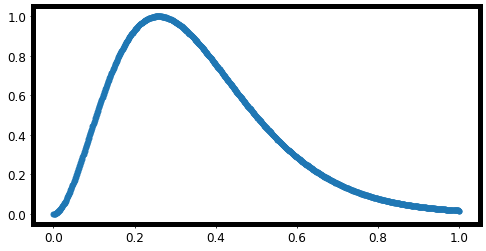

In [302]:
bbr_data_url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Lec_1/bbr.xls?raw=true"

bbr_data = pd.read_excel(bbr_data_url)

# bbr_data = pd.read_excel('bbr.xls')

data = bbr_data[[0,'T']]

# data.head()



X = data[0]
Y = data['T']

from sklearn.preprocessing import minmax_scale
X = minmax_scale(X.values.reshape(-1,1) )
Y = minmax_scale(Y.values.reshape(-1,1) )
# X = StandardScaler().fit_transform( X.values.reshape(-1,1) )



plt.scatter(X,Y)
plt.show()

# Overfitting and underfitting 

578
193


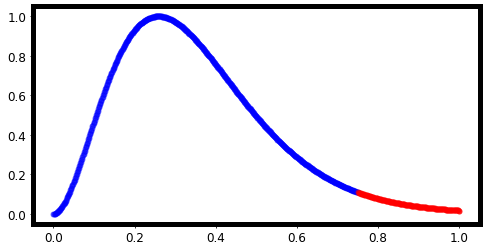

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=False)
print( len(X_train) )
print( len(X_test ) )
plt.scatter(X_train, Y_train, color = 'b', alpha=.5)
plt.scatter(X_test, Y_test, color = 'r', alpha=.5)

## Reminder

This is the result of training with 6 points.



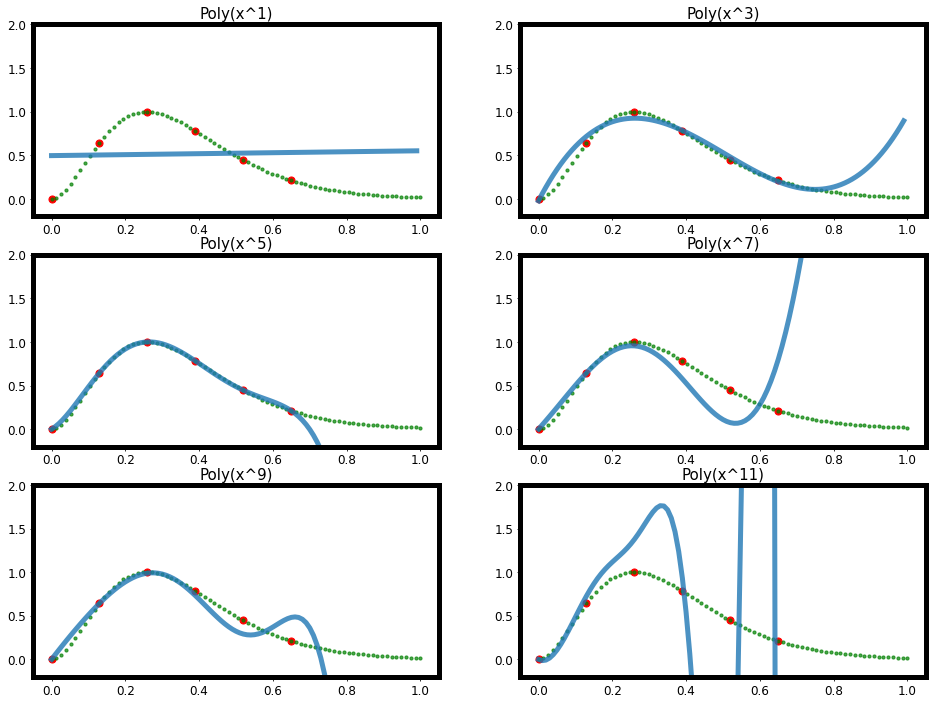

In [304]:
n_rate = 100   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')


from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    # ax.scatter(X, Y, s = 50, c = 'r', alpha =.5)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha = .8)

### Randomness helps

This is the result of training with 6 points.



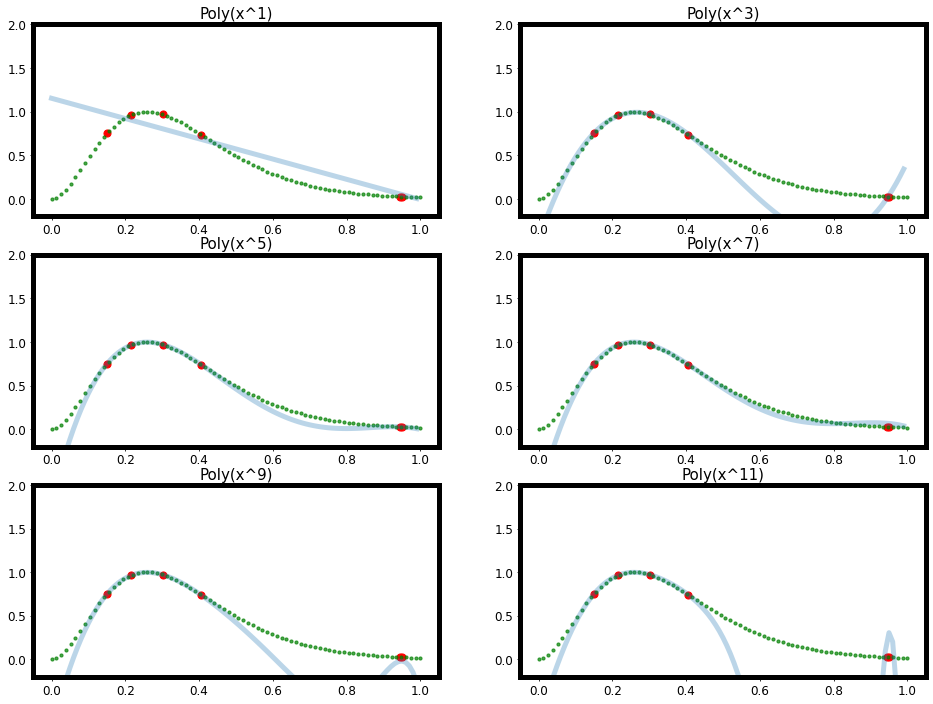

In [305]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)


n_rate = 100   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')

from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha =.3)

## But what helps most is more "data".

This is the result of training with 12 points.



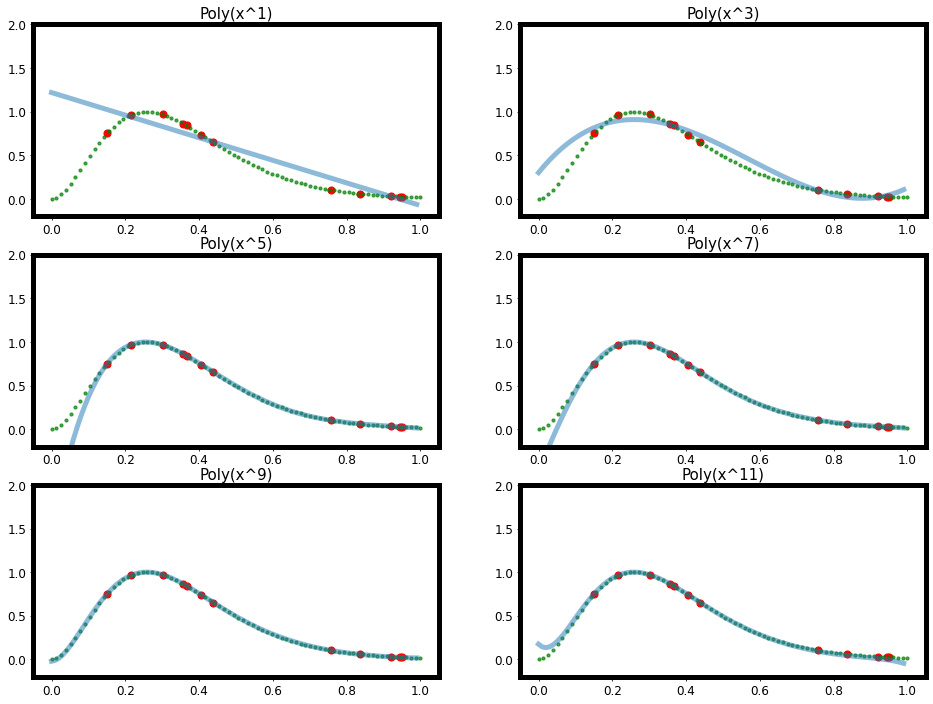

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)


n_rate = 50   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')

from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha =.5)

Just doubling the number of points from 6 to 12 lead to much more acceptable results. However, if we go for higher orders polynomial, we will still get poor results. 

So it is important to see how the model complexity/nonlinearity and also the size of the data contributes to the overall performance of the model. 

## Noise

A realistic data is often not this clean and is a lot more noisy. 

Then we would need a lot more data and even that may not be enough. 

In [0]:
#Let's add some noise.
noise = np.random.normal(0, .1, Y.shape)
Y = Y + noise


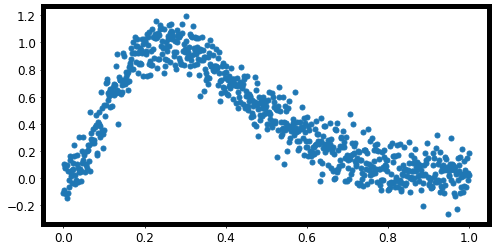

In [309]:
plt.scatter(X,Y)

This is the result of training with 12 points.



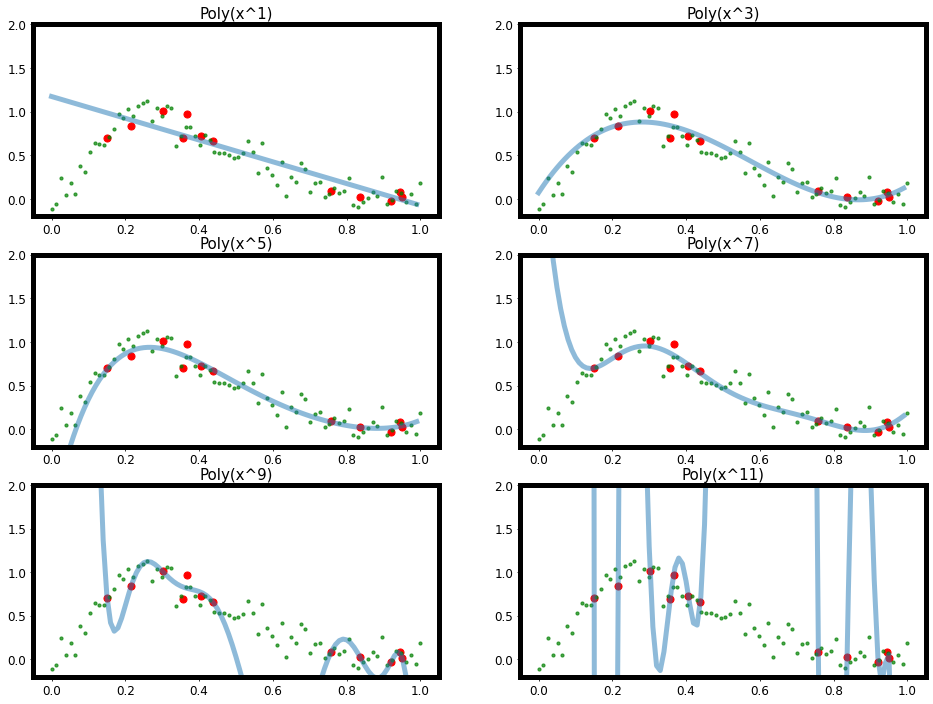

In [319]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)


n_rate = 50   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso
reg = LinearRegression(n_jobs=-1)

## It is convenient to make pipelines to get all the different pieces together.
from sklearn.pipeline import Pipeline


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    polynomial_features = PolynomialFeatures(degree=deg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", reg)])
    pipeline.fit(X_train[::n_rate], Y_train[::n_rate])

    ## Add the plot
    y_rg_list = pipeline.predict(x_range)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha =.5)

In [0]:
### Plot loss vs n_points for each one of these. 


def mse_loss(Y, Y_pred):
  return np.sum( (Y -  Y_pred)**2 )/len(Y)

ns_list = [5, 10, 15, 25, 30, 40, 50, 60, 80, 100]
deg_list = [1,  4, 7, 10,13, 18]

from sklearn.pipeline import Pipeline
reg = LinearRegression(n_jobs=-1)

loss_list = []
loss_in_list = []

for ns in ns_list:
  losses = []
  losses_in = []
  for deg in deg_list:
    polynomial_features = PolynomialFeatures(degree=deg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", reg)])
    pipeline.fit(X_train[:ns], Y_train[:ns])
    losses    += [mse_loss(Y_test, pipeline.predict(X_test)  )]
    losses_in += [mse_loss(Y_train, pipeline.predict(X_train)  )]

  loss_list += [losses]
  loss_in_list += [losses_in]

loss_list = np.array(loss_list)
loss_in_list = np.array(loss_in_list)

# loss_list.shape



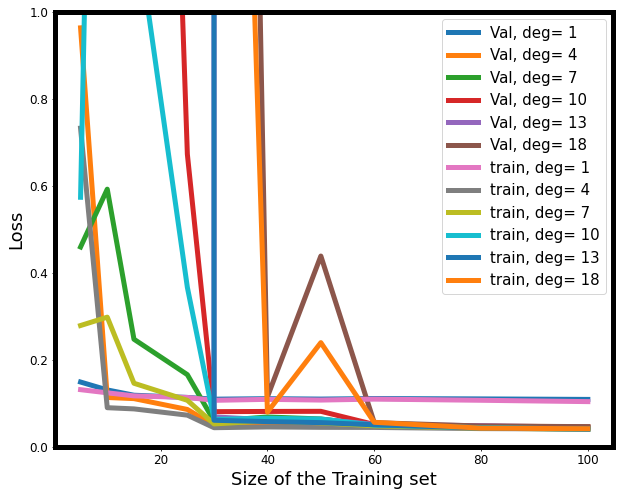

In [352]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, xlabel='Size of the Training set', ylabel="Loss")
[ ax.plot(ns_list, loss_list[:,d], label = f'Val, deg= {deg_list[d]}') for d in np.arange(len(deg_list))]
[ ax.plot(ns_list, loss_in_list[:,d], label = f'train, deg= {deg_list[d]}') for d in np.arange(len(deg_list))]
ax.set_ylim([0,1])
plt.legend(loc=0)

# Regularization

We can avoid some of of the harsh behavours of the model with limiting the range of the parameter of the model. For instance, we can penalize large values of w_i in the models above. Let's see how that would affect them. 

In [0]:
X = minmax_scale(data[0].values.reshape(-1,1) )
Y = minmax_scale(data['T'].values.reshape(-1,1) )

# print(len(X))
noise = np.random.normal(0, .2, Y.shape)
Y = Y + noise

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)

This is the result of training with 29 points.



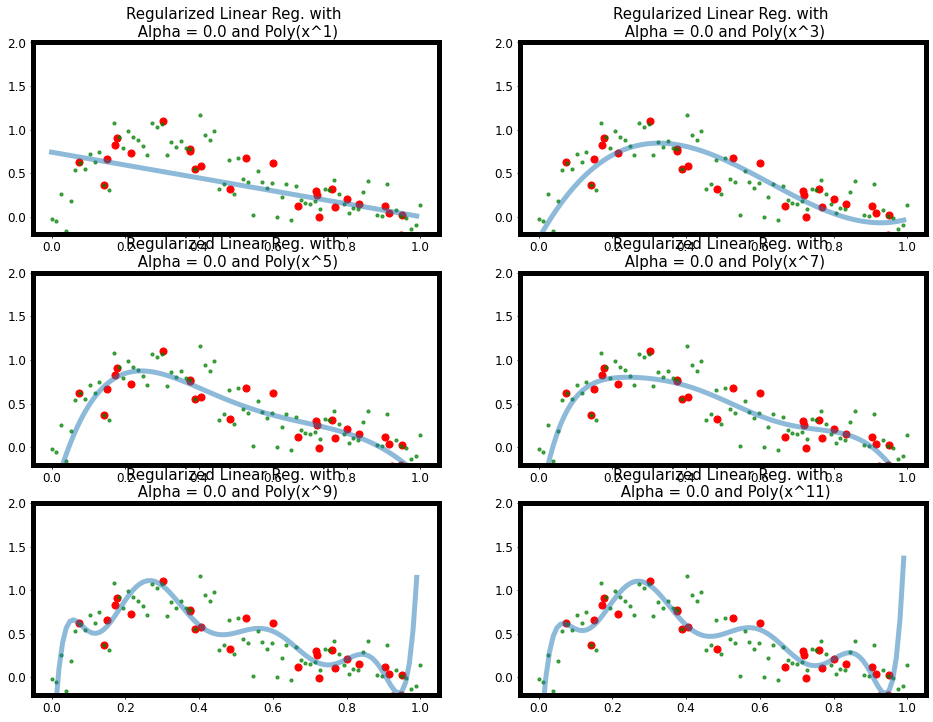

In [337]:

n_rate = 20   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')


from sklearn.linear_model import LinearRegression, Ridge, Lasso
##Let's have a regularization parameter. 
a = .00
reg = Ridge(alpha = a)

## It is convenient to make pipelines to get all the different pieces together.
from sklearn.pipeline import Pipeline


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1

    ## Bulding the model anf training it.
    polynomial_features = PolynomialFeatures(degree=deg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", reg)])
    pipeline.fit(X_train[::n_rate], Y_train[::n_rate])


    ## Generating a plot based on the predictions of the model. 
    y_rg_list = pipeline.predict(x_range)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Regularized Linear Reg. with \n Alpha = {a} and Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha =.5)

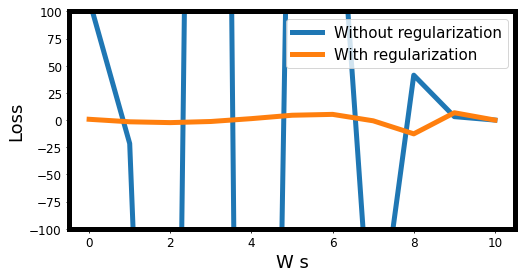

In [335]:
### Let's see what the regularization does to a polynomial model. 
deg = 10
polynomial_features = PolynomialFeatures(degree=deg)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel='W s', ylabel="Loss")

reg = Ridge(alpha = 0).fit(poly_features( X, deg), Y)

ax.plot(reg.coef_[0]  , label='Without regularization')

reg = Ridge(alpha = .01).fit(poly_features( X, deg), Y)

ax.plot(reg.coef_[0]  , label='With regularization')
ax.set_ylim([-100,100])
plt.legend(loc=0)

## Exercise: Playing with regularization

Do what we did before for alpha, 

Plot loss for different values of alpha and check how the performance changes. 


Plots w's vs alpha for l1 and l2 and elasatic regularization. 


In [0]:
Loss vs alpha


In [0]:
### Plot loss vs n_points for each one of these. 


def mse_loss(Y, Y_pred):
  return np.sum( (Y -  Y_pred)**2 )/len(Y)

ns_list = [5, 10, 15, 25, 30, 40, 50, 60, 80, 100]
alpha_list = [0, .0001, .001, .01,.1, 1]

from sklearn.pipeline import Pipeline
reg = LinearRegression(n_jobs=-1)

loss_list = []
loss_in_list = []

for ns in ns_list:
  losses = []
  losses_in = []
  for a in alpha_list:
    reg = Ridge(alpha = a ).fit(poly_features( X_train[:ns], deg), Y[:ns])

    # reg.fit(X_train[:ns], Y_train[:ns])
    losses    += [mse_loss(Y_test, reg.predict(poly_features(X_test, deg))  )]
    losses_in += [mse_loss(Y_train, reg.predict(poly_features(X_train,deg))  )]

  loss_list += [losses]
  loss_in_list += [losses_in]

loss_list = np.array(loss_list)
loss_in_list = np.array(loss_in_list)

# loss_list.shape



No handles with labels found to put in legend.


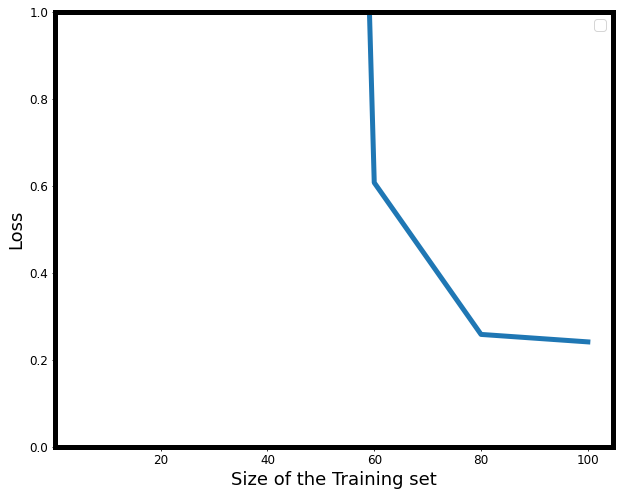

In [360]:
d = 2
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, xlabel='Size of the Training set', ylabel="Loss")
# [ ax.plot(ns_list, loss_list[:,d], label = f'Val, deg= {deg_list[d]}') for d in np.arange(len(deg_list))]
# [ ax.plot(ns_list, loss_in_list[:,d], label = f'train, deg= {deg_list[d]}') for d in np.arange(len(deg_list))]
ax.plot(ns_list, loss_list[:,2])
ax.set_ylim([0,1])
plt.legend(loc=0)

Bias and Variance Trade-off
==
Often, we our first toy model or estimator does not return a good accuracy and we need to play around and figure out what we need to change. The first two natural questions are 

- Is the model that we are trying good enough to capture the behviour of our data?
- Do we have enough data

Here we describe a procedure that helps us find the answers to these questions and systematically choose the right model and find a good set of hyper-parameters for our model.

The main tools we need for this part come from statistical learning. Namely we will go through the concept of Bias and Variance and the trade-off between them. We then use ''learning curve' and 'validation curve' to get a sense of how much data we need and how complex we should make our model. 

We will introduce some more tools later. 

In [237]:
X = minmax_scale(data[0].values.reshape(-1,1) )
Y = minmax_scale(data['T'].values.reshape(-1,1) )

print(len(X))
noise = np.random.normal(0, .2, Y.shape)
Y = Y + noise


771


In [56]:
%%time
poly_scores = []


polytransform = PolynomialFeatures( degree=2 )
# bbr_reg_poly = LinearRegression(n_jobs=-1)
bbr_reg_poly = Ridge()


n_tot = int(len(data) )    ## Total number of samples
n_points = 25              ## Number of points for the learning curve plot
ns_list = [  7, 10, 15, 30, 50, 80, 150, 200, 400]#np.arange(int(n_tot/n_points)-1,n_tot , int(n_tot/n_points) )      ## x-axis on the learning curve
n_avg = 200                ## Number of times to average

for ns in ns_list:        ## For different subset-sizes we try training our estimator
  e_in = 0
  e_out = 0               ## For each, we record the in and out score. 
  for i in range(n_avg):
    
    sample_data = data.sample(ns)
    X_train, X_test, Y_train, Y_test = train_test_split(sample_data[0].values.reshape(-1,1), sample_data['T'], random_state = 0)

    bbr_reg_poly.fit(       polytransform.fit_transform( X_train )      , Y_train )

    e_in  += mean_squared_error( Y_train, bbr_reg_poly.predict(polytransform.fit_transform( X_train ) ) )
    e_out += mean_squared_error( Y_test , bbr_reg_poly.predict(polytransform.fit_transform( X_test ) )  )
  
  poly_scores += [[e_in/n_avg, e_out/n_avg]]

  
poly_scores = np.array(poly_scores)  

CPU times: user 4.77 s, sys: 11.9 ms, total: 4.78 s
Wall time: 4.78 s


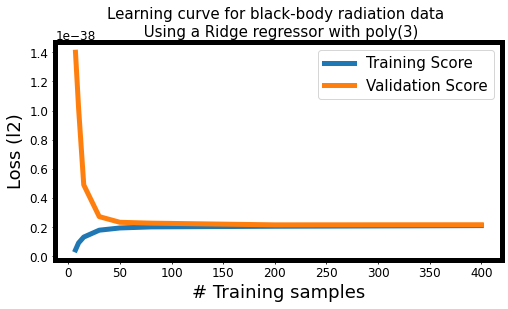

In [57]:
xlabel = '# Training samples'
ylabel = 'Loss (l2)'
plt_title = 'Learning curve for black-body radiation data \n Using a Ridge regressor with poly(3)'
fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, poly_scores[:,0], label = 'Training Score')
ax2.plot(ns_list, poly_scores[:,1], label = 'Validation Score')
ax2.legend(loc=0)
# ax2.set_ylim(0, poly_scores[3:,1].max())

plt.show()

In [0]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression, Ridge
# # from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

from sklearn.model_selection import KFold
from sklearn.base import clone

def mse_loss(Y, Y_pred):
  return np.sum( (Y -  Y_pred)**2 )/len(Y)

# function for learning curve
def plot_lc(model, X, Y, ns_list, n_cv=4):
  kf = KFold(n_cv)
  lc_list = []

  X_train , X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0)
  for ns in ns_list:
    X_sml, Y_sml = shuffle( X_train[:ns], Y_train[:ns])
        
    in_loss = []
    out_loss = []
    model_cp =  clone(model)
    for train, test in kf.split(X_sml):
      _X_train, X_val, _Y_train, Y_val = X_sml[train], X_sml[test], Y_sml[train], Y_sml[test]
      model_cp.fit( _X_train,  _Y_train)
      in_loss += [mse_loss(Y_val, model_cp.predict(  X_val  ) )  ]
      out_loss += [mse_loss(Y_test, model_cp.predict(  X_test  ) )  ]

    lc_list += [ [in_loss , out_loss] ]
    
  lc_list = np.array(lc_list)
  ## Calculating the mean for the performance of the model. 
  train_scores_mean = lc_list[:, 0].mean(axis = 1)
  validation_scores_mean = lc_list[:, 1].mean(axis = 1)
  # print(train_scores_mean- validation_scores_mean )

  ## Calculating the variance
  train_scores_std = lc_list[:, 0].var(axis = 1)
  validation_scores_std = lc_list[:, 1].var(axis = 1)


  ##Plotting the result
  xlabel = '# Training samples'
  ylabel = 'Loss (MSE)'
  plt_title = 'Learning curve'
  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
  ax.plot(ns_list, train_scores_mean, label = 'Training Score')
  ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

  plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkblue", lw=2)
  plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                  validation_scores_mean + validation_scores_std, alpha=0.2,
                  color="darkgreen", lw=2)


  ax.legend(loc=0)
  ax.set_ylim(-3, 1.5*validation_scores_mean.max())


  return None #np.array(lc_list)
  

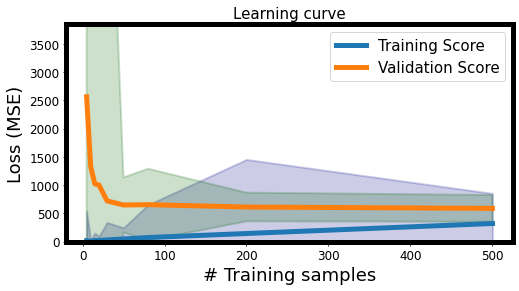

In [204]:
ns_list = [5, 10, 15 , 20,  30, 50, 80, 200, 500]

#Let's add some noise.
noise = np.random.normal(0, .5, Y.shape)
Y = Y + noise

from sklearn.svm import SVR
plot_lc(SVR(kernel = 'poly' ), X, Y, ns_list, n_cv = 5)

In [363]:
%%time
svr_scores = []
from sklearn.preprocessing import minmax_scale


opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR
svr = SVR(**opt_svr_param  )

svr = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )

n_tot = int(len(data) )
n_points = 10
# ns_list = np.arange(int(n_tot/n_points)-1,n_tot , int(n_tot/n_points) )
ns_list=np.array([ 2, 5, 10, 20 , 30 , 50, 76, 153, 307, 538, 615])
n_avg = 200

for ns in ns_list:
  e_in = 0
  e_out = 0
  for i in range(n_avg):
    
    sample_data = data.sample(ns)
    ## We'll come back to why we do the following scaling. 
    X = sample_data[0].values.reshape(-1,1)
    X = minmax_scale(X)
    X_train, X_test, Y_train, Y_test = train_test_split( X , sample_data['T']/sample_data['T'].mean(), random_state = 0)

    
    svr.fit(X_train,Y_train)
    e_in  += mean_squared_error(  Y_train, svr.predict(X_train )  )
    e_out += mean_squared_error(  Y_test,  svr.predict(X_test  )  )
  
  svr_scores += [[e_in/n_avg, e_out/n_avg]]

svr_scores = np.array(svr_scores)  

CPU times: user 14.2 s, sys: 15.2 ms, total: 14.2 s
Wall time: 14.3 s


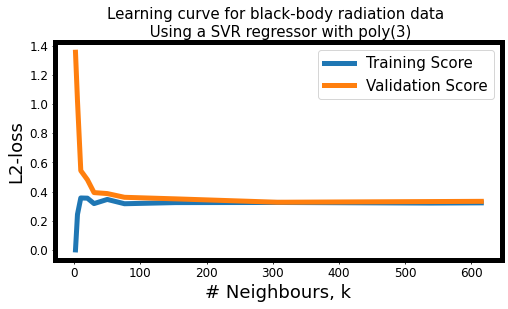

In [364]:
plt_title = 'Learning curve for black-body radiation data \n Using a SVR regressor with poly(3)'

fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, svr_scores[:,0], label = 'Training Score')
ax2.plot(ns_list, svr_scores[:,1], label = 'Validation Score')
ax2.legend(loc=0)
plt.show()

## How to do this in sklearn

In [0]:
from sklearn.model_selection import learning_curve, validation_curve

In [0]:


train_sizes = [ 5, 7, 10, 15, 25, 50, 100, 200, 500]

ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = SVR(**opt_svr_param), X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [216]:
print('Training scores:\n\n', pd.DataFrame( train_scores) )
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

           0         1         2         3         4
0 -0.000018 -0.000001 -0.000001 -0.000001 -0.000001
1 -0.000034 -0.000005 -0.000005 -0.000005 -0.000005
2 -0.000063 -0.000018 -0.000018 -0.000018 -0.000018
3 -0.000120 -0.000078 -0.000078 -0.000078 -0.000078
4 -0.000215 -0.000473 -0.000473 -0.000473 -0.000473
5 -0.000149 -0.004048 -0.004048 -0.004048 -0.004048
6 -0.000423 -0.010885 -0.010885 -0.010885 -0.010885
7 -0.000159 -0.001363 -0.000933 -0.000933 -0.000933
8 -0.000054 -0.000642 -0.000295 -0.000331 -0.000329

 ----------------------------------------------------------------------

Validation scores:

           0         1         2         3         4
0 -0.325449 -0.863727 -0.268499 -0.029335 -0.001771
1 -0.327567 -0.860192 -0.267383 -0.029105 -0.001720
2 -0.330295 -0.853427 -0.264836 -0.028473 -0.001580
3 -0.332913 -0.838121 -0.259083 -0.027078 -0.001291
4 -0.332340 -0.791272 -0.241496 -0.023028 -0.000633
5 -0.307518 -0.597771 -0.170450 -0.009993 -0.001551
6 

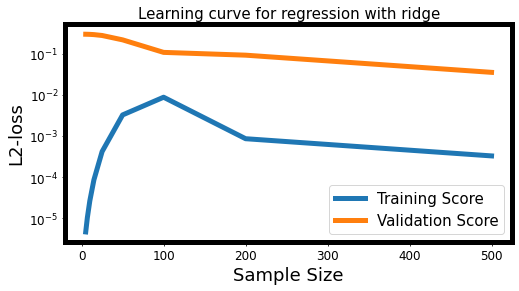

In [217]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')
ax.legend(loc=0)
plt.yscale('log')

plt.show()

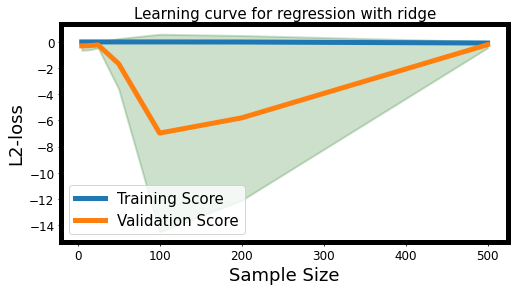

CPU times: user 274 ms, sys: 3.95 ms, total: 278 ms
Wall time: 278 ms


In [218]:
%%time

## Here's how you can use the function implemented in sklearn for this. 
## But note that this works with scores instead of loss. 
from sklearn.model_selection import learning_curve

ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = Ridge(alpha=a), X = X,
                                                  y = Y,  cv = 10, train_sizes=train_sizes, 
                                                   scoring = 'neg_mean_squared_error', random_state=11)

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = 'L2-loss'

plt_title = 'Learning curve for regression with ridge'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

In [210]:
ns_list

array([  2,   5,  10,  20,  30,  50,  76, 153, 307, 538, 615])

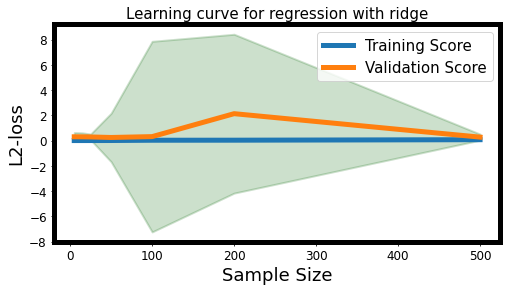

In [222]:
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = Ridge(), X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5,
                                                  scoring = 'neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

## Validation Curves

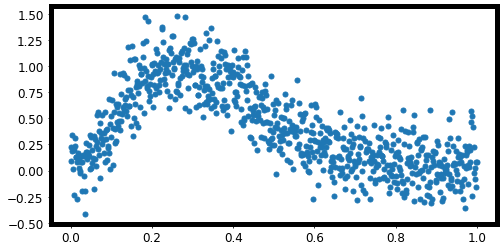

In [238]:
plt.scatter(X,Y)

In [0]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 340 out of 340 | elapsed:    2.2s finished


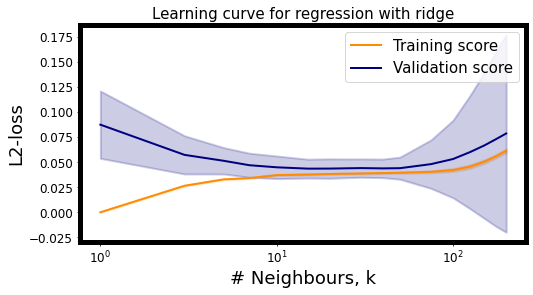

In [239]:
k_list = [1,3,5,7,10, 15, 20, 25, 30, 40, 50 , 75,  100, 125, 150, 175, 200]

train_scores, valid_scores = validation_curve(KNeighborsRegressor(), X, Y, 
                                              param_name="n_neighbors",
                                              param_range=k_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = - np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = '# Neighbours, k'
ylabel = 'L2-loss'

ptl_title = 'Validation curve for regression with KNN with k={}'.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(k_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(k_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(k_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

# Model Tuning

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [244]:
%%time
params = {'n_neighbors':k_list}
knn = KNeighborsRegressor()
reg_gs = GridSearchCV(knn, param_grid=params, n_jobs=-1, verbose=1, cv=50, scoring='neg_mean_squared_error')
reg_gs.fit(X, Y)
print( reg_gs.best_params_ )


Fitting 50 folds for each of 17 candidates, totalling 850 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'n_neighbors': 40}
CPU times: user 541 ms, sys: 13.1 ms, total: 554 ms
Wall time: 1.85 s


[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed:    1.8s finished


In [256]:
%%time
svc_reg = SVR()
# params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
# params = {'degree':[1,2,3,4,5,6,7,8,9,10,11,12], 'gamma':[.001, .01,.1,1,10], 'C':[.001,.01,.1], 'epsilon' : [.001,.01,.1]}
params = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'degree':[3,4],'gamma':[11,12,13,14], 'C':[.015,.02,.04], 'epsilon' : [.0015,.002,.004]}
# params = {'kernel':('poly', 'rbf'),'degree':[3,4]}
svc_reg_gs = GridSearchCV(svc_reg, param_grid=params, n_jobs=-1, verbose=1, cv=5)
svc_reg_gs.fit(X, Y)
print(svc_reg_gs.best_params_)
print(svc_reg_gs.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   20.1s


{'C': 0.04, 'degree': 3, 'epsilon': 0.0015, 'gamma': 14, 'kernel': 'rbf'}
-0.08548913335059614
CPU times: user 1.49 s, sys: 23.8 ms, total: 1.51 s
Wall time: 46.3 s


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   46.3s finished


In [257]:
print( svc_reg_gs.best_params_ )
print(svc_reg_gs.best_score_)
reg_gs.predict(X[:2])

{'C': 0.04, 'degree': 3, 'epsilon': 0.0015, 'gamma': 14, 'kernel': 'rbf'}
-0.08548913335059614


array([[0.09293676],
       [0.09293676]])

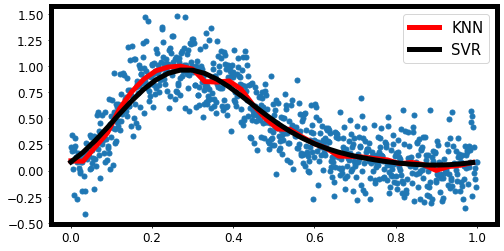

In [263]:
plt.scatter(X,Y)
plt.plot(np.arange(0,1,.03) ,reg_gs.predict( np.arange(0,1,.03).reshape(-1,1) ), color='r', label = 'KNN')
plt.plot(np.arange(0,1,.03) ,svc_reg_gs.predict( np.arange(0,1,.03).reshape(-1,1) ), color='black', label = 'SVR')
plt.legend(loc=0)
plt.show()

# Exercise: Classification

In [0]:
#https://drive.google.com/file/d/17UKL0GGf9VljROIaG3UMa6lVl3rWYAtc/view

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

targets = list(set(data['id']))
data['target'] = data['id'].apply(lambda x: targets.index(x)) 
data.drop('id',axis=1, inplace=True)

data.head()

,p,theta,beta,nphe,ein,eout,target
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,1
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,1
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,2
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,1
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,2


In [0]:
ns_tot=5000
features = data.columns[ [0, 1,2,3,4,5] ]
ind_1 = 1
ind_2 = 2
data = data[ (data['target']==ind_1) | (data['target']==ind_2) ]

m_data = data.sample(ns_tot)

X_train, X_test, Y_train, Y_test = train_test_split(m_data[features], m_data['target'], random_state = 0)


SVC gives a score of 0.6261333333333333 on training data and 
 0.6184 on test data.
knn gives a score of 0.9696 on training data and 
 0.9512 on test data.
